In [1]:
import random as rd
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 100
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3
c = np.vstack((np.zeros((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
dataset = pd.DataFrame(data=X, columns=['x','y','c'])


## Pseudo code used: pseudo code in class 


In [3]:
dataset.head()

,x,y,c
0,-0.334207,2.058738,0.0
1,3.264395,5.636814,1.0
2,-0.669884,1.856185,0.0
3,1.995284,4.484924,1.0
4,3.588041,4.739172,1.0


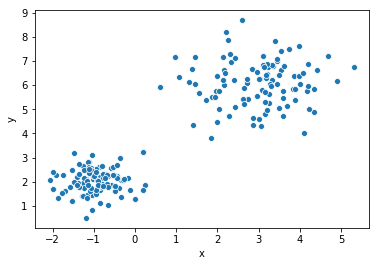

In [4]:
#plt.figure(figsize=(10,10))
sn.scatterplot(dataset['x'],dataset['y'])


In [5]:
Data_xy=dataset.drop('c', axis=1)
target=dataset['c']
target[target==0].count()

100

In [6]:
Norm=np.linalg.norm

In [7]:
class Jean_Kmean(object):

    def __init__(self, data, num_cluster, Max_iter=300):
        self.data=data
        self.num_cluster=num_cluster
        self.Max_iter=Max_iter

    def Cluster(self):
        #Classes=[[] for i in range(k)] # Initializing two empty calsses. Note that we create k classes in general. 
        indexes=np.random.choice(self.data.shape[0], self.num_cluster, replace=False) # Choosing random indexes to initilize the centers.
        Centers=np.array([[self.data.iloc[:,j][indexes[i]] for j in range(self.data.shape[1])] for i in range(self.num_cluster)])# Initializing the centers.
        Points_check_convergence=np.array([[np.random.random() for j in range(self.data.shape[1])] for i in range(self.num_cluster)]) # Creating points which allow us to enter in the while 
        #loop and are used to check wether there is convergence or not. This will work because the probability that those
        #points are exactly the ones in the initialization is very little.

        # Now we start our while-no-convergence loop
        num_iter=0 # Maximal number of iterations in the while-loop
        while((Points_check_convergence != Centers).any() or num_iter<self.Max_iter):
            Classes=[[] for i in range(self.num_cluster)]
            Points_check_convergence=Centers # Checking points updated
            for i in range(self.data.shape[0]): # Here we go through all the points of the data set and compute their distance to the centers
                P=np.array([self.data.iloc[i,j] for j in range(self.data.shape[1])]) 
                distances=[]
                for l in range(self.num_cluster):
                    distances.append(Norm(P-Centers[l]))
                Classes[distances.index(min(distances))].append(P) # Adding the point to the "closest"  class
            for s in range(self.num_cluster):
                Centers[s]=(1.0/len(Classes[s]))*sum(Classes[s])
            num_iter += 1
        return Classes # Returning the clusters
    
    def PlotClusters(self):
        Classes=self.Cluster()
        for i in range(self.num_cluster):
            sn.scatterplot(np.array(Classes[i])[:,0], np.array(Classes[i])[:,1], s=50)

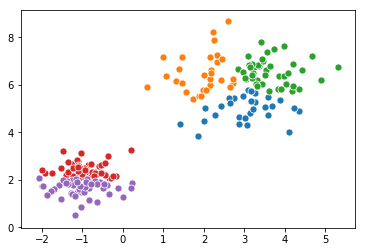

In [9]:

Kmeans=Jean_Kmean(Data_xy, 5)
Kmeans.PlotClusters()

In [108]:
target[target==1].count()

100

In [29]:
Train_data.iloc[:,:-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.9,2.4,3.3,1.0
2,5.7,2.8,4.1,1.3
4,5.7,2.8,4.5,1.3
5,5.2,3.5,1.5,0.2
6,5.4,3.9,1.3,0.4
7,5.1,3.8,1.9,0.4
8,4.8,3.0,1.4,0.1
9,5.7,4.4,1.5,0.4


In [35]:
Test_data.iloc[:,-1].shape[0]

92